In [1]:
import torch
from PIL import Image
from pytorch_lightning import seed_everything
from torchvision.utils import save_image
import torch.utils.checkpoint
from torchvision.transforms import ToPILImage

from model_lib.utils import parse_args, show_PIL_image

from dataset_lib.dataset_eval_MoMA import Dataset_evaluate_MoMA
from model_lib.modules import MoMA_main_modal

In [2]:
seed_everything(0)
args = parse_args()

args.device = torch.device("cuda", 0)

Seed set to 0


In [4]:
#load MoMA from HuggingFace. Auto download
args.model_path = "KunpengSong/MoMA_llava_7b"
moMA_main_modal = MoMA_main_modal(args).to(args.device, dtype=torch.bfloat16)


# This will automatically download the following files:
# - VAE: stabilityai--sd-vae-ft-mse
# - StableDiffusion: Realistic_Vision_V4.0
# - MoMA: 
#     - the-Multi modal LLM: MoMA_llava_7b (based on LLaVA 7b)
#     - the attentions and LLM mappings: attn_adapters_projectors.th


# It could take a while to download these models, if it is the first time running this code.
# so please be patient...

Loading VAE: stabilityai--sd-vae-ft-mse...
Loading StableDiffusion: Realistic_Vision...


Loading pipeline components...: 100%|██████████| 5/5 [00:35<00:00,  7.07s/it]


Loading MoMA: its Multi-modal LLM...


Loading checkpoint shards: 100%|██████████| 2/2 [02:07<00:00, 63.51s/it]
Some weights of the model checkpoint at KunpengSong/MoMA_llava_7b were not used when initializing LlavaLlamaForCausalLM: ['model.vision_tower.vision_tower.vision_model.encoder.layers.19.layer_norm2.bias', 'model.vision_tower.vision_tower.vision_model.pre_layrnorm.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.18.self_attn.v_proj.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.3.self_attn.q_proj.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.7.self_attn.q_proj.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.7.self_attn.v_proj.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.8.layer_norm1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.12.self_attn.q_proj.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.2.self_attn.q_proj.weight', 'model.vision_tower.vision_tower.vision_mode

Loading Attentions and LLM mappings...


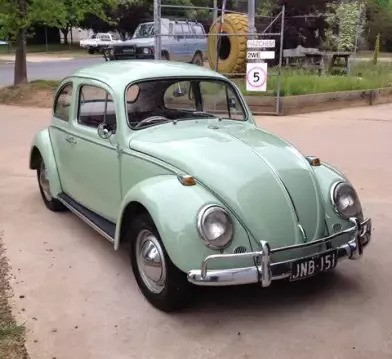

In [4]:
# reference image
rgb_path = "example_images/myImages/3.jpg"
mask_path = "example_images/myImages/3_mask.jpg"
subject = 'car'

Image.open(rgb_path).convert("RGB")

num = 3 # generate 3 images

/common/home/ks1418/.conda/envs/LLM2/lib/python3.9/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:293: FutureWarning: `_encode_prompt()` is deprecated and it will be removed in a future version. Use `encode_prompt()` instead. Also, be aware that the output format changed from a concatenated tensor to a tuple.
  deprecate("_encode_prompt()", "1.0.0", deprecation_message, standard_warn=False)
100%|██████████| 50/50 [00:11<00:00,  4.30it/s]


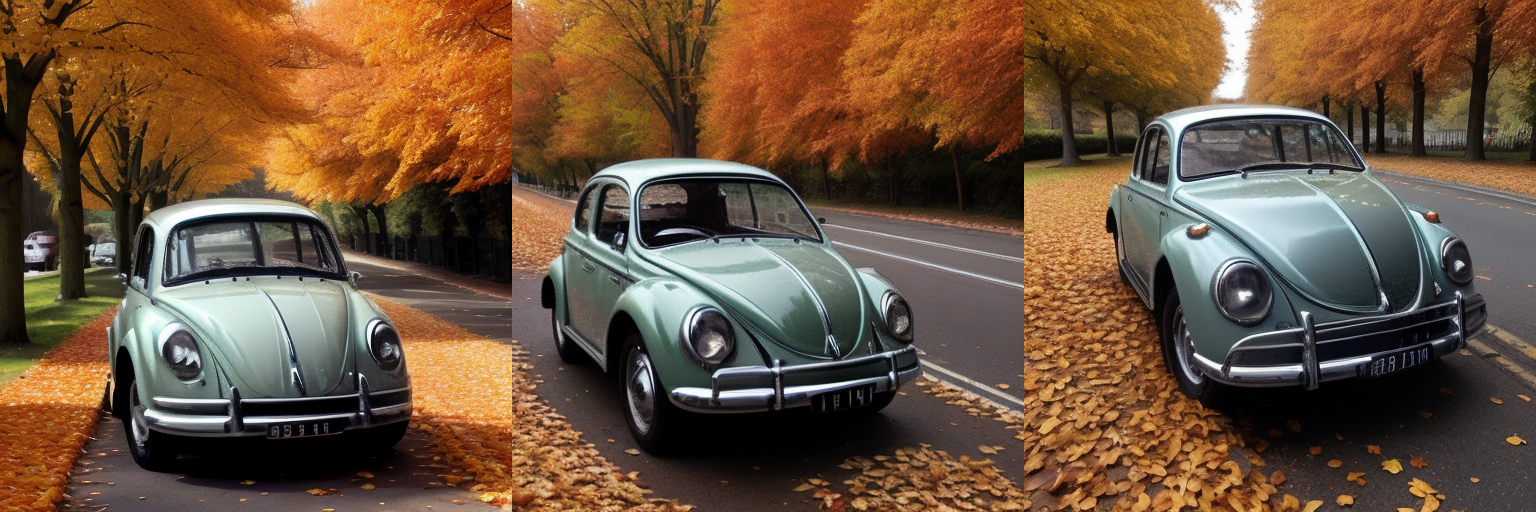

In [5]:
################ change context ##################
prompt = "A car in autumn with falling leaves."
generated_image = moMA_main_modal.generate_images(rgb_path, mask_path, subject, prompt, strength=1.0,  num=num, seed=0, return_mask=False)  # set strength to 1.0 for more accurate details

# (show image)
generated_image


100%|██████████| 50/50 [00:11<00:00,  4.20it/s]


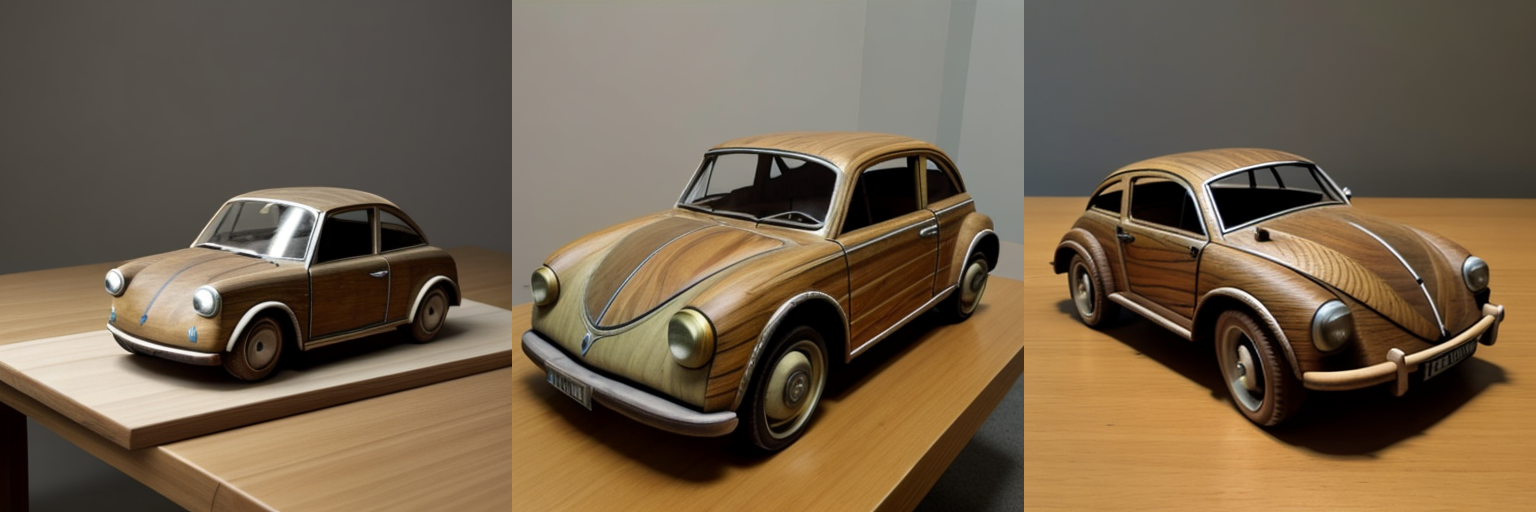

In [7]:
################ change texture ##################
prompt = "A wooden sculpture of a car on the table."
generated_image = moMA_main_modal.generate_images(rgb_path, mask_path, subject, prompt, strength=0.4,  num=num, seed=3, return_mask=False)  # set strength to 0.4 for better prompt fidelity

# (show image)
generated_image

### Thank you for your attention

+ project page: https://moma-adapter.github.io/
+ arxiv page: https://arxiv.org/abs/2404.05674

+ Github repository: https://github.com/KunpengSong/MoMA/tree/main
+ HuggingFace repository: https://huggingface.co/KunpengSong/MoMA_llava_7b/tree/main